# Período 9

In [9]:
import numpy as np
from datetime import datetime
import requests
import pandas as pd

In [25]:
r = requests.get('http://vps-40d69db1.vps.ovh.ca:21046/api/ExecucaoSimulacaos/melhorValidacaoPeriodoFlat?idPeriodo=9')
j = r.json()
df = pd.DataFrame.from_dict(j)

In [12]:
df.columns


Index(['simulacaoId', 'ticker', 'simulacaoResultado', 'simulacaoLucro',
       'simulacaoPrejuizo', 'target', 'stop', 'tipo', 'experimentoSimulacaoId',
       'validacaoLucro', 'validacaoPrejuizo', 'saldoValidacao'],
      dtype='object')

# Evolução da Execução do Validador

In [26]:
now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print(dt_string)
df.groupby('experimentoSimulacaoId').count()

08/01/2022 15:34:07


,simulacaoId,ticker,simulacaoResultado,simulacaoLucro,simulacaoPrejuizo,target,stop,tipo,validacaoLucro,validacaoPrejuizo,saldoValidacao
experimentoSimulacaoId,,,,,,,,,,,
54,14458,14458,14458,14458,14458,14458,14458,14458,14422,14422,14422
56,11335,11335,11335,11335,11335,11335,11335,11335,24,24,24
57,13439,13439,13439,13439,13439,13439,13439,13439,0,0,0
58,13297,13297,13297,13297,13297,13297,13297,13297,0,0,0


In [14]:
now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print(dt_string)
df.groupby('experimentoSimulacaoId').count()

08/01/2022 15:17:18


,simulacaoId,ticker,simulacaoResultado,simulacaoLucro,simulacaoPrejuizo,target,stop,tipo,validacaoLucro,validacaoPrejuizo,saldoValidacao
experimentoSimulacaoId,,,,,,,,,,,
54,14458,14458,14458,14458,14458,14458,14458,14458,14422,14422,14422
56,11335,11335,11335,11335,11335,11335,11335,11335,0,0,0
57,13439,13439,13439,13439,13439,13439,13439,13439,0,0,0
58,13297,13297,13297,13297,13297,13297,13297,13297,0,0,0


### Quantidade de simulações dentro do conceito de melhores pelo indicador do período

In [15]:
print("Simulações com pontos mínimos: " , len(df))

Simulações com pontos mínimos:  52529


In [16]:
df.groupby(['experimentoSimulacaoId','saldoValidacao']).size()

experimentoSimulacaoId  saldoValidacao
54                      -2.0                46
                        -1.0              2452
                         0.0              8642
                         1.0              3228
                         2.0                54
dtype: int64

In [17]:
dfTotais =  df.groupby(['saldoValidacao']).size().to_frame('qtde')

In [18]:
dfTotais['percentual'] = dfTotais.qtde / dfTotais.qtde.sum()

In [19]:
dfTotais

,qtde,percentual
saldoValidacao,,
-2.0,46,0.003190
-1.0,2452,0.170018
0.0,8642,0.599223
1.0,3228,0.223825
2.0,54,0.003744


<AxesSubplot:ylabel='percentual'>

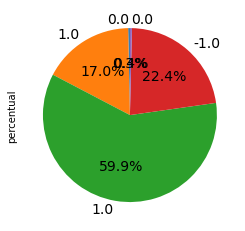

In [20]:
dfTotais.plot(kind='pie', y = 'percentual', autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df['saldoValidacao'], legend = False, fontsize=14)